In [1]:
import TNGFunctions as TNG
import PlotFunctions as plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MATH
import warnings
import os

from scipy.interpolate import interp1d
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import WMAP7
from matplotlib.lines import Line2D


plt.style.use('abhner.mplstyle')
np.seterr(divide='ignore') # ignore divide by zero


warnings.filterwarnings( "ignore")



In [2]:
# cosmological parameters
Omegam0 = 0.3089
h = 0.6774

#SIM TNG
SIMTNG = 'TNG50'

#Paths
dfTime = pd.read_csv(os.getenv("HOME")+'/TNG_Analyzes/SubhaloHistory/SNAPS_TIME.csv')
df_z0_Mstar_Range = TNG.extractDF('Sample', SIM=SIMTNG)
PaperI = TNG.extractDF('PaperI', SIM=SIMTNG)

# Fig. 1

Coeficientes: [0.28263299]
Intercepto: -2.5228679606606486
Mean squared error: 0.0010
R²: 0.7743
Coeficientes: [-0.0668152]
Intercepto: 0.3794684021109672
Mean squared error: 0.0000
R²: 0.8594
max
0.28263298764312605 *x +  -2.5228679606606486
min
-0.06681519996004814 *x +  0.3794684021109672


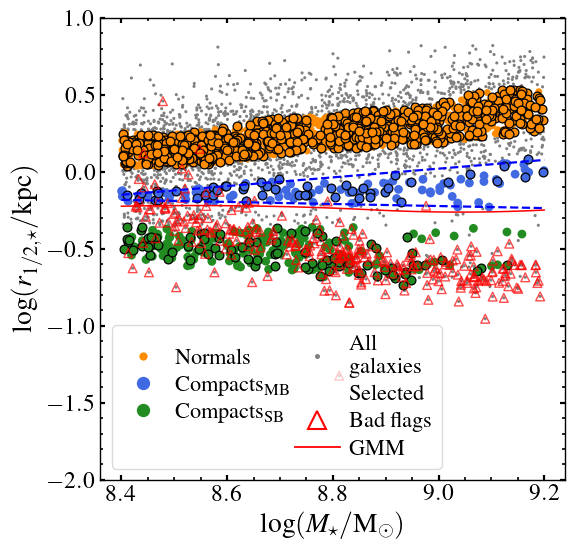

In [3]:
fig=plt.figure(facecolor='white')
plt.rcParams.update({'figure.figsize': (6, 6)})
X = np.transpose(np.array([df_z0_Mstar_Range.logMstarRad_99,df_z0_Mstar_Range.logHalfRadstar_99]))
Masses = np.linspace(8.4, 9.2, 100)


plt.scatter(X[:,0],X[:,1],s=5,c='gray',ec='none')

# Main branch

# Normals
plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalNotSelected', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalNotSelected', SubfindID_99 = True))],
            s=25,c='darkorange', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            s=25,c='darkorange', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalCentral', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('NormalCentral', SubfindID_99 = True))],
            s=40,c='darkorange', linewidths= 0.9)


# Compact Main branch
plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCNotSelected', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCNotSelected', SubfindID_99 = True))],
            s=40,c='royalblue', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCSatellite', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCSatellite', SubfindID_99 = True))],
            s=40,c='royalblue', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCCentral', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBCCentral', SubfindID_99 = True))],
            s=40,c='royalblue', linewidths= .9)



# Compact Secondary branch
plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCNotSelected', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCNotSelected', SubfindID_99 = True))],
            s=40,c='forestgreen', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCSatellite', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCSatellite', SubfindID_99 = True))],
            s=40,c='forestgreen', ec= 'none')

plt.scatter(PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCCentral', SubfindID_99 = True))],
            PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('SBCCentral', SubfindID_99 = True))],
            s=40,c='forestgreen', linewidths= .9)


# Compact Main branch

Xs = np.array([v for v in PaperI.logMstarRad_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBC', SubfindID_99 = True))].values])
Ys = np.array([v for v in PaperI.logHalfRadstar_99[PaperI.SubfindID_99.isin(TNG.extractPopulation('MBC', SubfindID_99 = True))].values])

q100 =100
q0 =0
num_bins = 5
# Create bins and compute quantiles for each bin
bin_indices = np.digitize(Xs, np.linspace(min(Xs), max(Xs), num_bins + 1))
quantile_data = []

for bin_num in range(1, num_bins + 1):
    y_in_bin = Ys[bin_indices == bin_num]

    bin_quantiles = np.percentile(y_in_bin, q100)
    bin_quantiles_0 = np.percentile(y_in_bin, q0)


    median = np.median(y_in_bin)
    quantile_data.append({
        'bin': bin_num,
        'bin_start': np.linspace(min(Xs), max(Xs), num_bins + 1)[bin_num - 1],
        'bin_end': np.linspace(min(Xs), max(Xs), num_bins + 1)[bin_num],
        'bin_mean': (np.linspace(min(Xs), max(Xs), num_bins + 1)[bin_num - 1] + np.linspace(min(Xs), max(Xs), num_bins + 1)[bin_num]) / 2,
        'y_median': median,
        'q100th': bin_quantiles,
        'q0th': bin_quantiles_0,
    })
ProbsMBC = pd.DataFrame(quantile_data)

q100thFuncMBC = interp1d(ProbsMBC.bin_mean, ProbsMBC.q100th, kind = 'quadratic', fill_value = 'extrapolate')
q0thFuncMBC = interp1d(ProbsMBC.bin_mean, ProbsMBC.q0th, kind = 'quadratic', fill_value = 'extrapolate')

model, _ = MATH.LinerReg(Xs, q100thFuncMBC(Xs)) 
model0, _ = MATH.LinerReg(Xs, q0thFuncMBC(Xs))


plt.plot(Masses, Masses*model.coef_[0] + model.intercept_, color = 'blue', ls = '--', lw = 1.6)
plt.plot(Masses, Masses*model0.coef_[0] + model0.intercept_, color = 'blue', ls = '--', lw = 1.6)

print('max')
print(model.coef_[0], '*x + ', model.intercept_)
print('min')
print(model0.coef_[0], '*x + ', model0.intercept_)



plt.scatter(PaperI.logMstarRad_99[ (PaperI.Flags == 0)],
            PaperI.logHalfRadstar_99[ (PaperI.Flags == 0)], marker = '^',
            s=40,c='none', ec = 'red', alpha = 0.7)

plt.plot(Masses, q0thFuncMBC(Masses) - 0.03, color = 'red', ls = '-', lw = 1.1)

columnspacing = 0.2
handletextpad = 0.4
labelspacing = 0.3
fontlegend= 27
framealpha= 0.7
alphaScater=0.8
quantile=0.28

custom_lines, label, ncol, mult = plot.Legend(
    ['NormalScatter',  'MBCScatter', 'SBCScatter', 'None', 'TNGrageScatter', 'SelectedScatter',  'BadFlagScatterEmpty', 'GMM'])
plt.legend(
    custom_lines, label, ncol=ncol, fontsize=mult*fontlegend, framealpha=framealpha, 
    columnspacing = columnspacing, handletextpad = handletextpad, labelspacing = labelspacing)

plt.ylim(-2.0, 1.0)
#plt.xlim(0, 10)
plt.tick_params(labelsize = 0.85 * 20)
plt.xlabel(r'$\log(M_\star/\mathrm{M}_\odot)$', fontsize = 20)
plt.ylabel(r'$\log(r_{1/2, \star}/\mathrm{kpc})$', fontsize = 20)


plt.savefig(os.getenv("HOME")+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperI/PlotScatter/sizevsM_Classes.pdf')


# Fig. 2


 Type:  Central
Normal  X =  0.0103157983747527 Y =  0.0738401367106206
SBC  X =  0.0145886356609824 Y =  0.0764684488322249
MBC  X =  0.0124559953798373 Y =  0.065908634985924


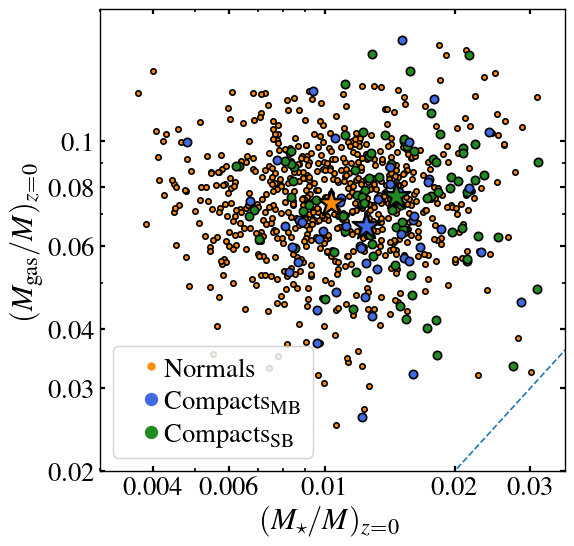

In [4]:
plot.PlotScatter(['Normal', 'SBC', 'MBC'], ['Central'], 'StarFrac_99', 'GasFrac_99',  Type='z0', snap=[99],
 title=False, medianBins=False, medianAll=False, xlabelintext=False, All=None,
                legend=True, LegendNames=[['NormalScatter', 'MBCScatter', 'SBCScatter']],  TRANSPARENT = False, COLORBAR = None, medianDot = True, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2,  fontlabel=22, 
                m='o', msizet=4.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                ylimmin = [0.03], ylimmax = [0.19], xlimmin = [0.003], xlimmax = [0.036], MarkerSizes = None,
                legpositions = [[0,0]],
                loc = ['best'],
                lNum = 6, cNum = 6,
                columnspacing = 0.5, handletextpad = -0.5, labelspacing = 0.3, 
                savepath='PaperI/PlotScatter',  savefigname='GasStarFracs_centrals', dfName='PaperI', SampleName='Samples', cmap = 'inferno',
                bins=10, seed=16010504, mult = 4.1)

# Fig. 3

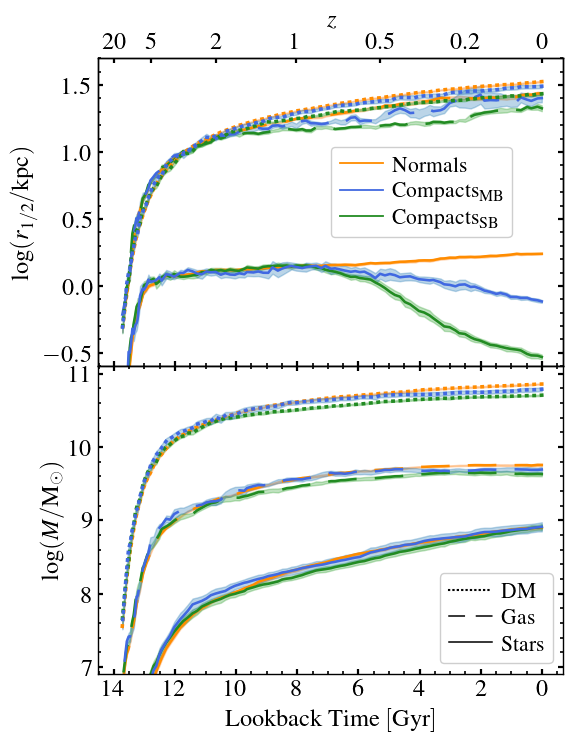

In [5]:
plot.PlotMedianEvolution(['Normal', 'SBC', 'MBC'], ['Central'],  [['SubhaloHalfmassRadType0', 'SubhaloHalfmassRadType1', 'SubhaloHalfmassRadType4'], ['SubhaloMassType0', 'SubhaloMassType1', 'SubhaloMassType4']], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=True, lineparams=True,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='MassesSize', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC'], ['Type1', 'Type0',  'Type4']],
                        loctext = ['best'],
                        ylimmin = [-0.6, 6.9], ylimmax = [1.7, 11.1], xlimmin = None, xlimmax = None,
                        legpositions = [[0,0], [0, 1]],
                        loc = [(0.5, 0.42), 'best'],
                        lNum = 4, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95, fontlabel=17.75,    nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)


# Fig. 4

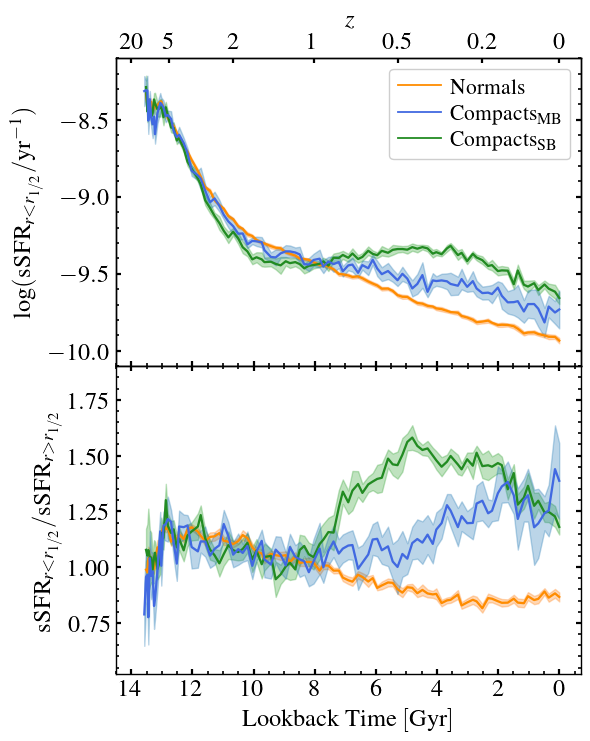

In [6]:
plot.PlotMedianEvolution(['Normal', 'SBC', 'MBC'], ['Central'],  [ 'SubhalosSFRInHalfRad', 'sSFRCoreRatio'], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True,  GridMake = False,
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='SFR', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        legpositions = [[0,0]],
                        loc = ['best'], 
                        loctext = ['best'],
                        ylimmin = [-10.1, 0.52], ylimmax = [-8.1, 1.9], xlimmin = None, xlimmax = None,
                        lNum = 4, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95, fontlabel=17.75,  nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 5

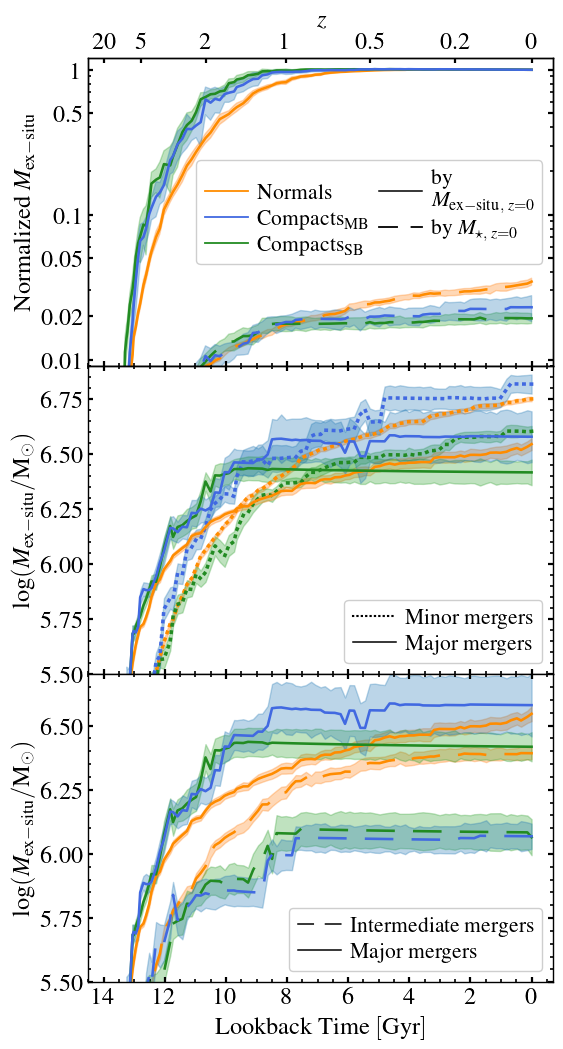

In [7]:
plot.PlotMedianEvolution(['Normal','SBC', 'MBC'], ['Central'],  [['MassExNormalizeAll', 'MassExNormalize'], ['StellarMassExSituMinor', 'StellarMassExSituMajor'], ['StellarMassExSituIntermediate', 'StellarMassExSituMajor']], 
                     Type='Evolution', Xparam=['Time'], title=[''], 
                        xlabelintext=True, lineparams=True,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='LastMergerMean', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC',  'MassExNormalize', 'MassExNormalizeAll',], ['StellarMassExSituMinor', 'StellarMassExSituMajor'], ['StellarMassExSituIntermediate', 'StellarMassExSituMajor']],
                        loc = ['best', 'best', 'best'],  loctext = ['best'],
                        ylimmin = [0.009, 5.5, 5.5], ylimmax = [1.2,6.9, 6.7], xlimmin = None, xlimmax = None,
                        legpositions= [[0,0], [0,1], [0,2]],
                        lNum = 4, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95, fontlabel=17.75,     nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# FIG. 6

SBC: 1.944183548133988
Normal: 4.037510884762591
MBC: 2.2377430324348846
SBC: 2.980437109262349
Normal: 4.29293865372019
MBC: 2.7595274385528565
SBC: 10.534345398907874
Normal: 11.13764243152481
MBC: 9.555567440841244


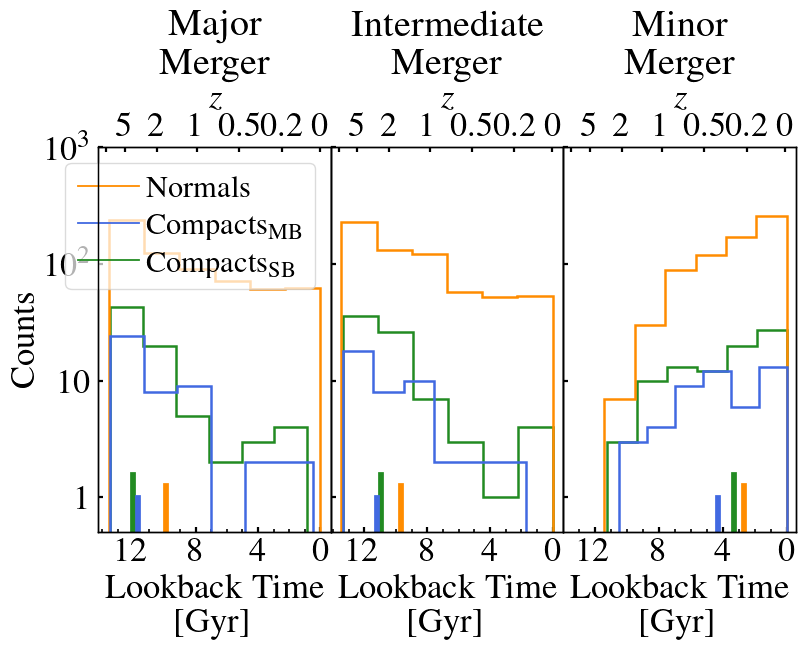

In [8]:
plot.PlotHist(['SBC', 'Normal',  'MBC'], 
              ['LBTimeMajorMerger',
             'LBTimeIntermediateMerger', 'LBTimeMinorMerger'], ['Central'],  Type = 'z0',
               savepath='PaperI/PlotHist',  savefigname='Mergers', dfName='PaperI', SampleName='SubfindID_99', 
                density=False, 
                ColumnPlot = False, bins=6, median=True,  legend = True, 
                lNum = 5, cNum = 3,
                LegendNames = [[ 'Normal', 'MBC', 'SBC']], 
                loc = ['upper right'],
                legpositions= [[0,0]],
                title = ['Major \n Merger', 'Intermediate \n Merger', 'Minor \n Merger'],
                yscale = 'log', TRANSPARENT = True, LookBackTime = True,
                fontlabel=25, 
                framealpha=0.7, handletextpad = 0.25)

In [9]:
TNG.compare_Sample_key('LBTimeMajorMerger', [['NormalCentral', 'SBCCentral'],
                                             ['SBCCentral', 'MBCCentral'],
                                             ['NormalCentral', 'MBCCentral']], dfName = 'PaperI')

NormalCentral  and  SBCCentral
Medians:  4.038 1.944
Observed Test Statistic: 2.09333
Permutation Test P-Value: 0.0024
SBCCentral  and  MBCCentral
Medians:  1.944 2.238
Observed Test Statistic: 0.29356
Permutation Test P-Value: 0.64164
NormalCentral  and  MBCCentral
Medians:  4.038 2.238
Observed Test Statistic: 1.79977
Permutation Test P-Value: 0.04636


In [10]:
TNG.compare_Sample_key('LBTimeIntermediateMerger', [['NormalCentral', 'SBCCentral'],
                                             ['SBCCentral', 'MBCCentral'],
                                             ['NormalCentral', 'MBCCentral']], dfName = 'PaperI')

NormalCentral  and  SBCCentral
Medians:  4.293 2.98
Observed Test Statistic: 1.3125
Permutation Test P-Value: 0.02946
SBCCentral  and  MBCCentral
Medians:  2.98 2.76
Observed Test Statistic: 0.22091
Permutation Test P-Value: 0.7837
NormalCentral  and  MBCCentral
Medians:  4.293 2.76
Observed Test Statistic: 1.53341
Permutation Test P-Value: 0.05338


In [11]:
TNG.compare_Sample_key('LBTimeMinorMerger', [['NormalCentral', 'SBCCentral'],
                                             ['SBCCentral', 'MBCCentral'],
                                             ['NormalCentral', 'MBCCentral']], dfName = 'PaperI')

NormalCentral  and  SBCCentral
Medians:  11.138 10.534
Observed Test Statistic: 0.6033
Permutation Test P-Value: 0.1914
SBCCentral  and  MBCCentral
Medians:  10.534 9.556
Observed Test Statistic: 0.97878
Permutation Test P-Value: 0.4066
NormalCentral  and  MBCCentral
Medians:  11.138 9.556
Observed Test Statistic: 1.58207
Permutation Test P-Value: 0.00414


# FIG. 7

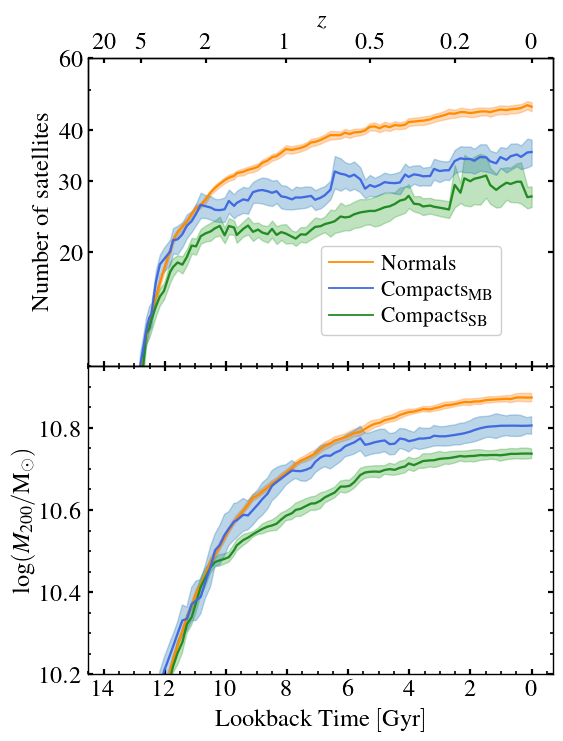

In [12]:
plot.PlotMedianEvolution(['Normal', 'SBC', 'MBC'], ['Central'],  ['GroupNsubsFinalGroup', 'Group_M_Crit200FinalGroup'], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=True, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='Environment', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = [(0.5, 0.1), 'best'],  
                        legpositions= [[0,0]],
                        loctext = ['best'],
                        ylimmin = [10.5, 10.2], ylimmax = [49, 10.95], xlimmin = None, xlimmax = None,
                        lNum = 4, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=17.75,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# FIG. 8

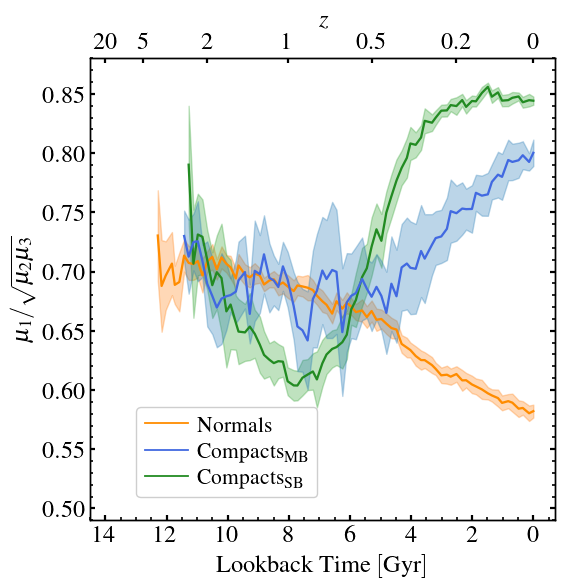

In [13]:
plot.PlotMedianEvolution(['Normal', 'SBC', 'MBC'], ['Central'],  ['MassTensorEigenVals'], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='MassTensorEigenVals', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = [(0.1, 0.05), 'best'],  
                        legpositions= [[0, 0]],
                        loctext = ['best'],
                        ylimmin = [0.49], ylimmax = [0.88], xlimmin = None, xlimmax = None,
                        lNum = 6, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,fontlabel=17.75,  nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# FIG. 9

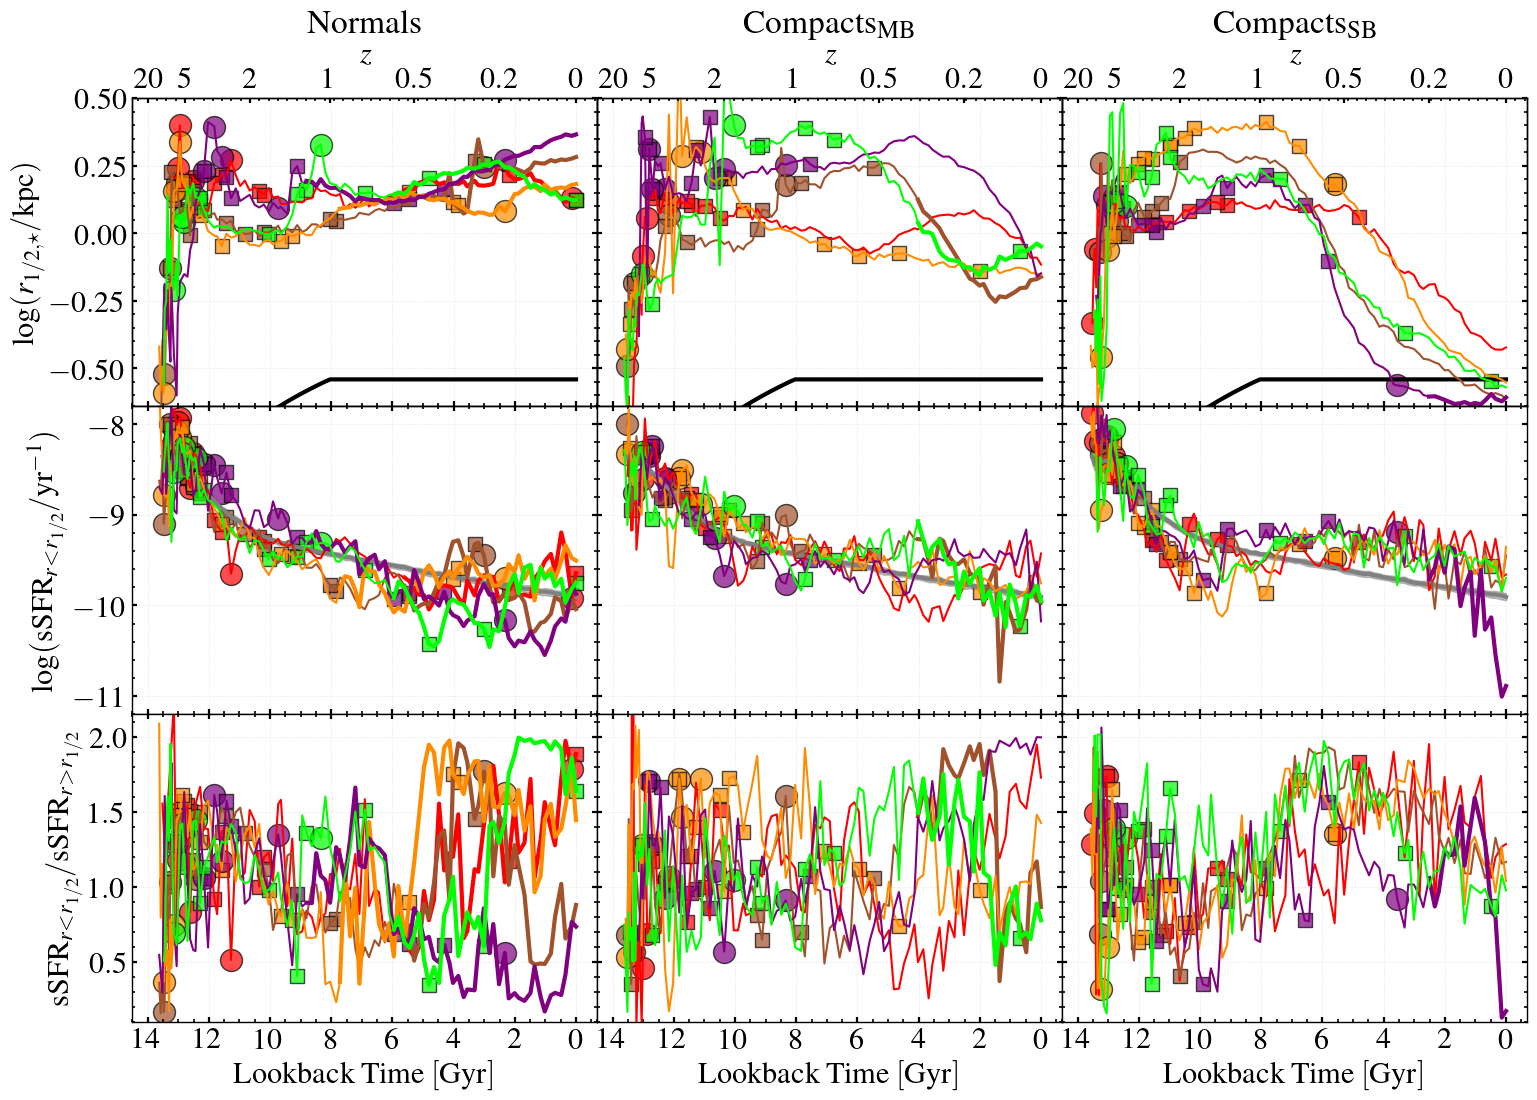

In [14]:
SBCIDs = np.array([761821, 778666, 780425,   739194, 785559])
MBCIDs = np.array([783943, 738133, 769934, 770153, 749386]) 
NormalIDs = np.array([714911, 712763, 761619, 716339, 741473])


plot.PlotID(['Normal', 'MBC', 'SBC'],  ['SubhaloHalfmassRadType4', 'SubhalosSFRInHalfRad', 'sSFRCoreRatio'], [NormalIDs, MBCIDs, SBCIDs], 
            dataLine= 'SubhaloBHMass', dataMarker= 'NumMergersTotal', Type = 'Evolution',  
            savepath='PaperI/PlotID',  savefigname='Random', dfName='PaperI', SampleName='SubfindID_99',  LookBackTime = True,
            ylimmin = [-0.64, -11.2, 0.1], ylimmax = [0.5, -7.8, 2.15], xlimmin = None, xlimmax = None, GridMake = True,
            lNum = 4, cNum = 6,
            ColumnPlot=False, limaxis=False, xlabelintext=False, TRANSPARENT = True, legend=False, title=['Normals', 'Compacts$_\mathrm{MB}$', 'Compacts$_\mathrm{SB}$'], lineparams=False, 
            loc='best', QuantileError = False, linewidth = 1.5, fontlabel=22, 
            Softening = True, sSFRMedian = True)

# FIG. 10

In [ ]:
SBCIDsCentral = np.array([739194, 740825, 741036, 744263, 744635, 749035, 751151, 752325,
                          752916, 753296, 757238, 758555, 759129, 759892, 760751, 765898, 
                          767101, 768765, 770874, 778666, 780425, 785559, 785950, 792469, 812192])


MBCIDsCentral = np.array([672278, 700751, 707285, 714346, 715936, 721013, 733149, 734293,
                        735498, 738133, 739055, 745073, 749075, 749386, 750985, 753849,
                        755575, 757420, 762377, 769934, 770153, 770855, 784941, 792155,
                        792389]) 


NormalIDsCentral = np.array([709899, 712763, 715387, 725002, 734581, 735185, 736455, 736730,
                               737577, 741473, 741724, 741881, 741918, 744080, 747118, 753140,
                               754771, 761302, 763055, 765251, 765458, 770509, 777130, 777358,
                               791967])

plot.PlotProfile([NormalIDsCentral, MBCIDsCentral, SBCIDsCentral],
                 ['NormalCentral', 'MBCCentral', 'SBCCentral' ], 
                 [40, 50, 67, 84, 99], ['RadVelocity',  'joverR',  'DensityGasOverR2', 'sSFR', 'DensityStarOverR2'],
                 ['PartType0','PartType0', 'PartType0',  'PartType0', 'PartType4', 'PartType4'], Condition = 'All', 
                 nbins = 28,   nboots = 50, line = True,
                 ylimmin = [-70, 7.1, 1.2e5, 2.5e-11, 5e4], ylimmax = [11, 95, 2.2e7, 5e-9, 5e8], xlimmin = [0.15], xlimmax = [52],
                 lNum = 6, cNum = 6,
                 columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, handlelength = 1., linewidth=1.0,
                 savepath='PaperI/PlotProfile',  savefigname='All', dfName='PaperI', SampleName='SubfindID_99',  cumulative = True, legend=True, norm = True, 
                 LegendNames= np.array([['Normal'], ['MBC'], ['SBC']]), 
                 loc = ['best', 'best', 'best'],
                 legpositions= [[0,0], [1, 0], [2,0]],
                 Softening = True, fontlabel= 39.5, framealpha = 0.6)

ID:  709899
ID:  712763
ID:  715387
ID:  725002
ID:  734581
ID:  735185
ID:  736455
ID:  736730
ID:  737577
ID:  741473
ID:  741724
ID:  741881
ID:  741918
ID:  744080
ID:  747118
ID:  753140
Doesn't have  PartType0  at snap:  50
ID:  754771
ID:  761302
ID:  763055
ID:  765251
ID:  765458
ID:  770509
ID:  777130
ID:  777358
ID:  791967
ID:  709899
ID:  712763
ID:  715387
ID:  725002
ID:  734581
ID:  735185
ID:  736455
ID:  736730
ID:  737577
ID:  741473
ID:  741724
ID:  741881
ID:  741918
ID:  744080
ID:  747118
ID:  753140
ID:  754771
ID:  761302
ID:  763055
ID:  765251
ID:  765458
ID:  770509
ID:  777130
ID:  777358
ID:  791967
ID:  709899
ID:  712763
ID:  715387
ID:  725002
ID:  734581
ID:  735185
ID:  736455
ID:  736730
ID:  737577
ID:  741473
ID:  741724
ID:  741881
ID:  741918
ID:  744080
ID:  747118
ID:  753140
ID:  754771
ID:  761302
ID:  763055
ID:  765251
ID:  765458
ID:  770509
ID:  777130
ID:  777358
ID:  791967
ID:  709899
ID:  712763
ID:  715387
ID:  725002
ID:  734581
ID

# Fig. 11

In [ ]:
plot.PlotMedianEvolution(['NormalWithoutBH', 'SBCWithoutBH', 'MBCWithoutBH', 'NormalWithBH', 'SBCWithBH', 'MBCWithBH'], ['Central'],  ['SubhaloHalfmassRadType4'], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='BHEvolution', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC', 'WithBH', 'WithoutBH']],
                        loc = [(0.001, 0.02), 'best'], 
                        legpositions = [[0,0]] ,
                        loctext = ['best'],
                        ylimmin = [-0.6], ylimmax = [0.3], xlimmin = None, xlimmax = None,
                        lNum = 6, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95, fontlabel=17.75,     nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 12

In [ ]:
plot.PlotMedianEvolution(['SBC', 'Normal', 'MBC'],['Central'], [['ExMassType0Evolution', 'ExMassType1Evolution', 'ExMassType4Evolution']],  
                       Type='Evolution', Xparam=['Time'], 
                        xlabelintext=True, lineparams=True,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='ExMasses', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC', 'Type0','Type1', 'Type4']],
                        loc = [(0.35, 0.02), 'best'],  
                        legpositions= [[0,0]],
                        loctext = ['best'],
                        ylimmin = [6], ylimmax = [9.6], xlimmin = None, xlimmax = None,
                        lNum = 6, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,fontlabel=17.75,   nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 13

In [ ]:
plot.PlotMedianEvolution(['Normal', 'SBC', 'MBC'], ['Central'],  ['logjProfile'], 
                     Type='Evolution', Xparam=['Time'], 
                        xlabelintext=False, lineparams=False,  LookBackTime = True, 
                        ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                        Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                        savepath='PaperI/PlotMedianEvolution',  savefigname='GasVelInflowOCGM', dfName='PaperI', SampleName='SubfindID_99', 
                        Supertitle_Name = 'DM-rich',LegendNames=[['Normal', 'MBC', 'SBC']],
                        loc = [(0.25, 0.02), 'best'],  
                        legpositions= [[0,0]],
                        loctext = ['best'],
                        ylimmin = [1.9], ylimmax = [3.24], xlimmin = None, xlimmax = None,
                        lNum = 6, cNum = 6,
                        alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,  fontlabel=17.75,    nboots=100,  
                        Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                        bins=10, seed=16040105)

# Fig. 14

In [ ]:
GAMAAll = pd.read_csv(os.getenv('HOME')+'/TNG_Analyzes/SubhaloHistory/GAMA/GAMA_tsLcP0.csv')
PaperI = TNG.extractDF('PaperI', SIM=SIMTNG)

plt.style.use('abhner.mplstyle')
plt.rcParams.update({'figure.figsize': (6, 6)})

GAMAScatter = GAMAAll.loc[(GAMAAll.logmstar > 8.4)  & (GAMAAll.Z > 0.002)  & (GAMAAll.Z < 0.025) & (GAMAAll.logmstar < 9.2) & (~np.isnan(GAMAAll['logReff_i'].values))]


sSFR = np.array([value for value in PaperI.sSFRHalfRad_99.values])
sSFR[sSFR > 0] = np.log10(sSFR[sSFR > 0])
sSFR[sSFR == 0] = -14
sSFR[np.isnan(sSFR)] = -14

PaperI.sSFRHalfRad_99 = sSFR

sSFR = np.array([value for value in GAMAScatter.sSFR_0_1Gyr_best_fit.values])
sSFR[sSFR > 0] = np.log10(sSFR[sSFR > 0])
sSFR[sSFR == 0] = -14
sSFR[np.isnan(sSFR)] = -14

GAMAScatter.sSFR_0_1Gyr_best_fit = sSFR


plt.scatter(PaperI.logMstarRad_99[(PaperI.Name == 'SBC') ],
            PaperI.RhalfiRandom_99[(PaperI.Name == 'SBC') ], c = 'darkseagreen', marker = 'D',
            s=30, linewidths= .0,  edgecolors= 'black', vmin = -12, vmax = -9.1)

plt.scatter(PaperI.logMstarRad_99[ (PaperI.Name == 'MBC') ],
            PaperI.RhalfiRandom_99[(PaperI.Name == 'MBC') ], c =  'lightblue',  marker = 'o',
            s=45, linewidths= .0,  edgecolors= 'black',  vmin = -12, vmax = -9.1)

plt.scatter(PaperI.logMstarRad_99[(PaperI.Name == 'Normal')],
            PaperI.RhalfiRandom_99[(PaperI.Name == 'Normal')], c = 'navajowhite',  marker = '^',
            s=30, linewidths= .0,  edgecolors= 'black',  vmin = -12, vmax = -9.1)
            
plt.scatter(GAMAScatter.logmstar.values,GAMAScatter.logReff_i.values ,
            alpha=0.9, marker = '*', s = 80,  label = 'GAMA', c ='crimson', edgecolors = 'black', lw = .0,
      vmin = -12, vmax = -9.1)
        
#xs = np.linspace(8.4, 9.2)
#ys = regr.predict(xs[:, np.newaxis])

#plt.plot(xs, ys, color="tab:red", linewidth=2.)


#cmap = plt.get_cmap('rainbow_r',3)
#cb = plt.colorbar(sc)
#cb.set_label(r'$\log (\mathrm{sSFR} / \mathrm{Gyr}^{-1})$', fontsize = 14)

plt.xlabel(r'$\log(M_\star /\mathrm{M_\odot})$', fontsize = 18)
plt.ylabel(r'$\log(r_{\mathrm{eff}} /\mathrm{kpc})$', fontsize = 18)

plt.tick_params(labelsize = 0.85 * 20)
plt.xticks([8.4, 8.6, 8.8, 9.0, 9.2])


#plt.grid(True, color="grey",  which="major", linestyle="-.")

custom_lines, label, ncol, mult = plot.Legend(
    ['NormalGamaColorScatter', 'MBCGamaColorScatter', 'SBCGamaColorScatter', 'GAMAColorScatter'])

columnspacing = 0.05
handletextpad = 0.001
labelspacing = 0.3
fontlegend= 24
framealpha= 0.7


plt.legend(
    custom_lines, label, ncol=ncol, fontsize=mult*fontlegend, framealpha=framealpha, 
    columnspacing = -0.1, handletextpad = handletextpad, labelspacing = labelspacing)


plt.ylim(-1.3, 0.5)

plt.savefig(os.getenv('HOME')+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperI/PlotScatter/SizeMass_sSFR.pdf', bbox_inches='tight')

# Fig. 15

In [ ]:
plt.style.use('abhner.mplstyle')
plt.rcParams.update({'figure.figsize': (9, 6)})

GAMA = GAMAAll.loc[(GAMAAll.logmstar > 8.4)  & (GAMAAll.Z > 0.002)  & (GAMAAll.Z < 0.1) & (GAMAAll.logmstar < 9.2) 
                        ]
GAMA = GAMAAll.loc[(GAMAAll.logmstar > 8.4)  & (GAMAAll.Z > 0.002)  & (GAMAAll.Z < 0.1) & (GAMAAll.logmstar < 9.2) & (~np.isnan(GAMAAll['logReff_i'].values))
        & (~np.isnan(GAMAAll['sSFR_0_1Gyr_best_fit'].values))]

print('Galaxies number: ', len(GAMA))

SamplePassive = PaperI.loc[PaperI.sSFRHalfRad_99 < -11]
SampleStarForming = PaperI.loc[PaperI.sSFRHalfRad_99 > -11]

GAMAPassive = GAMA.loc[GAMA.sSFR_0_1Gyr_best_fit < 10**-11]
GAMAStarForming = GAMA.loc[GAMA.sSFR_0_1Gyr_best_fit > 10**-11]


s = 0.18

minsize = round(min(SampleStarForming.RhalfiRandom_99[(PaperI.Name == 'SBC') |(PaperI.Name == 'Normal') | (PaperI.Name == 'MBC')]), 1)
maxsize = round(max(SampleStarForming.RhalfiRandom_99[(PaperI.Name == 'SBC') |(PaperI.Name == 'Normal') | (PaperI.Name == 'MBC')]), 1)


N = (maxsize-minsize)/s
Nplus1 = int(N + 1)

minsize = round(maxsize -  Nplus1*s, 1)
bins = np.linspace(minsize, maxsize, Nplus1)


histGAMASF = plt.hist(GAMAStarForming.logReff_i.values,  bins = bins,density = False,
           color= 'blue', histtype='step' ) # weights=1/WMAP7.comoving_distance(GAMAStarForming.Z).value**3, 

histGAMAQ = plt.hist(GAMAPassive.logReff_i.values,  bins = bins, density = False,
           color= 'blue', histtype='step')

histGAMA = plt.hist(GAMA.logReff_i.values,  bins = bins, density = False,
           color= 'blue', histtype='step')

plt.close()
plt.rcParams.update({'figure.figsize': (9, 6)})

histSF = plt.hist(SampleStarForming.RhalfiRandom_99[(SampleStarForming.Name == 'SBC') |(SampleStarForming.Name == 'Normal') | (SampleStarForming.Name == 'MBC')], density = False,
           color= 'blue', histtype='step', ls = '--',  lw = 1.5,  bins = bins)

histQ = plt.hist(SamplePassive.RhalfiRandom_99[(SamplePassive.Name == 'SBC') |(SamplePassive.Name == 'Normal') | (SamplePassive.Name == 'MBC')], density = False,
           color= 'red', histtype='step', ls = '--',  lw = 1.5,  bins = bins)

hist = plt.hist(PaperI.RhalfiRandom_99[(PaperI.Name == 'SBC') |(PaperI.Name == 'Normal') | (PaperI.Name == 'MBC')], density = False,
           color= 'black', histtype='step', ls = '--',  lw = 1.5,  bins = bins)
plt.close()

plt.style.use('abhner.mplstyle')

fig = plt.figure()
plt.rcParams.update({'figure.figsize': (9, 6)})
gs = fig.add_gridspec(3, 1, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')

NormalizationSF = np.sum(histSF[0]) / np.sum(histGAMASF[0])
ySF = histGAMASF[0]*NormalizationSF
ySF = np.append(ySF, [0])
xSF = np.append([histGAMASF[1][0]-s], histGAMASF[1])
ySF = np.append([0], ySF)
axs[0].step(xSF, ySF, 
           color= 'tab:blue', lw = 1.3)
axs[0].fill_between(xSF,ySF, step="pre",  color= 'tab:blue', alpha=0.2)


NormalizationQ = np.sum(histQ[0]) / np.sum(histGAMAQ[0])
yQ = histGAMAQ[0]*NormalizationQ
yQ = np.append(yQ, [0])
xQ = np.append([histGAMAQ[1][0]-s], histGAMAQ[1])
yQ = np.append([0], yQ)
axs[1].step(xQ, yQ, color= 'deeppink', lw = 1.3)
axs[1].fill_between(xQ,yQ, step="pre",  color= 'deeppink', alpha=0.2)

Normalization = np.sum(hist[0]) / np.sum(histGAMA[0])
y = histGAMA[0]*Normalization
y = np.append(y, [0])
x = np.append([histGAMA[1][0]-s], histGAMA[1])
y = np.append([0], y)

axs[2].step(x, y, 
           color= 'black', lw = 1.3)
axs[2].fill_between(x,y, step="pre",  color= 'black', alpha=0.2)



histSF = axs[0].hist(SampleStarForming.RhalfiRandom_99[(SampleStarForming.Name == 'SBC') |(SampleStarForming.Name == 'Normal') | (SampleStarForming.Name == 'MBC')], density = False,
           color= 'blue', histtype='step', ls = '--',  lw = 1.7,  bins = bins)

histQ = axs[1].hist(SamplePassive.RhalfiRandom_99[(SamplePassive.Name == 'SBC') |(SamplePassive.Name == 'Normal') | (SamplePassive.Name == 'MBC')], density = False,
           color= 'red', histtype='step', ls = '--',  lw = 1.7,  bins = bins)

hist = axs[2].hist(PaperI.RhalfiRandom_99[(PaperI.Name == 'SBC') |(PaperI.Name == 'Normal') | (PaperI.Name == 'MBC')], density = False,
           color= 'black', histtype='step', ls = '--',  lw = 1.7,  bins = bins)


custom_lines = np.array([ Line2D([0], [0], color='black', lw = 1.), Line2D([0], [0], color='black', ls = '--', lw = 1.)])
label = np.array(['GAMA', 'TNG50'])


axs[1].legend(custom_lines, label, loc = 'upper left',  fontsize = 16, ncol= 1, columnspacing = 0.5, handletextpad = 0.5, labelspacing = 0.5, handlelength = 0.7)
axs[0].text(0.32, 300, 'SF', color = 'blue')
axs[1].text(0.1, 300, 'Passive', color = 'red')
axs[2].text(0.32, 300, 'All', color = 'black')

for ax in axs:
    ax.set_yscale('log')
    bottom, top = ax.set_ylim()
    ax.set_ylim(1.5, 450)
    ax.set_ylabel(r'count', fontsize = 18)
    ax.set_yticks([10, 100, 1000], [ '10', '100', '$10^3$'])

plt.xlabel(r'$\log r_{\mathrm{eff}} \, \, [\mathrm{kpc}]$', fontsize = 18)

plt.savefig(os.getenv('HOME')+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperI/PlotHist/sizeHist_bysSFRz0_1.pdf', bbox_inches='tight',)

NameError: name 'plt' is not defined